**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_r_kernel_local -p 8888:8888 -d palmoreck/jupyterlab_r_kernel:1.1.0
```

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_r_kernel_local
```


Documentación de la imagen de docker `palmoreck/jupyterlab_r_kernel:1.1.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/r_kernel).

---

Nota generada a partir de [liga1](https://www.dropbox.com/s/kns8on2z8f0gva3/Computo-matricial.pdf?dl=0) y [liga2](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0) 

En esta nota revisamos a los **mínimos cuadrados lineales con y sin regularización**. La **regularización** que revisamos es la de **[Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization)** también nombrada $\ell_2$ o ***ridge*** y la $\ell_1$ o también conocida como **[*lasso*](https://en.wikipedia.org/wiki/Lasso_(statistics)** (Tibshirani, 1996). Se revisan los modelos anteriores desde el punto de vista numérico, no de interpretabilidad y se comparan los resultados del paquete [glmnet stanford](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html), [glmnet cran](https://cran.r-project.org/web/packages/glmnet/index.html) de R con los obtenidos en la implementación hecha por el prof en [algoritmos/R](algoritmos/R), en específico [algoritmos/R/algorithms_for_uco.R](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/algoritmos/R/algorithms_for_uco.R) para problemas tipo UCO (Unconstrained Convex Optimization). 

# Mínimos cuadrados

Obsérvese que hay una gran cantidad de modelos por mínimos cuadrados, por ejemplo:

* [Lineales](https://en.wikipedia.org/wiki/Linear_least_squares) u [ordinarios](https://en.wikipedia.org/wiki/Ordinary_least_squares) (nombre más usado en Estadística y Econometría).

* [Generalizados](https://en.wikipedia.org/wiki/Generalized_least_squares), [ponderados](https://en.wikipedia.org/wiki/Weighted_least_squares).

* [No lineales](https://en.wikipedia.org/wiki/Non-linear_least_squares).

* [Totales](https://en.wikipedia.org/wiki/Total_least_squares) y [parciales](https://en.wikipedia.org/wiki/Partial_least_squares_regression).

* [No negativos](https://en.wikipedia.org/wiki/Non-negative_least_squares).

* [Rango reducido](https://epubs.siam.org/doi/abs/10.1137/1.9780898718867.ch7).


# Mínimos cuadrados lineales

Cada uno de los modelos anteriores tienen diversas aplicaciones y propósitos. Los lineales son un caso particular del problema más general de **aproximación por normas**:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||$$

donde: $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$ son datos del problema, $x \in \mathbb{R}^n$ es la variable de optimización y $|| \cdot||$ es una norma en $\mathbb{R}^m$. $x^* = \text{argmin}_{x \in \mathbb{R}^n} ||Ax-b||$ se le nombra **solución aproximada** de $Ax \approx b$ en la norma $|| \cdot ||$. El vector: $r(x) = Ax -b$ se le nombra **residual** del problema.

**Comentario:** el problema de aproximación por normas también se le nombra **problema de regresión**. En este contexto, los vectores $a_1, a_2, \dots, a_n$ (columnas de $A$) son nombradas regresoras y el vector $\displaystyle \sum_{j=1}^n x_j^*aj$ con $x^*$ óptimo del problema es nombrado la **regresión de $b$ sobre las regresoras**.


Si en el problema de aproximación de normas anterior se utiliza la norma Euclidiana o norma $2$, $|| \cdot ||_2$, y se eleva al cuadrado la función objetivo se tiene:

$$\displaystyle \min_{x \in \mathbb{R}^n} ||Ax-b||^2_2$$

que es el modelo por mínimos cuadrados lineales cuyo objetivo es minimizar la suma de cuadrados de las componentes del residual $r(x)$.


**En lo que continúa la variable de optimización será $\beta$ y no $x$**:

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de mínimos cuadrados se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/a6pjx0pdqa3cp60/mc_beta.png?dl=0" heigth="400" width="400">


donde: $r(\beta) = y-A\beta$, el vector $y \in \mathbb{R}^m$ contiene las entradas $y_i$'s y la matriz $A \in \mathbb{R}^{m \times n}$ contiene a las entradas $x_i$'s o funciones de éstas $\forall i=0,1,\dots,m$.. Por el dibujo se tiene que cumplir que $A^Tr(\beta)=0$, esto es: las columnas de $A$ son ortogonales a $r(\beta)$. La ecuación anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(\beta)=A^T(y-A\beta)=A^Ty-A^TA\beta.$$

Finalmente, considerando la variable de optimización $\beta$ y al vector $y$ tenemos: $A^TA \beta = A^Ty$.

* En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

* La función objetivo en los mínimos cuadrados lineales puede escribirse de las siguientes formas:

$$f_o(\beta)=\displaystyle \sum_{i=1}^{20} (y_i -f_o(x_i|\beta))^2 = \displaystyle \sum_{i=1}^{20} (y_i - A[i,:]^T\beta)^2 = ||y - A \beta||_2^2= (y-A\beta)^T(y-A\beta) = y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta$$

con $A[i,:]$ $i$-ésimo renglón de $A$ visto como un vector en $\mathbb{R}^n$. Y es común dividir por $2$ la función objetivo para finalmente tener el problema:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta.$$

En cualquier reescritura de la función $f_o$, el problema de aproximación con normas, o bien en su caso particular de mínimos cuadrados, es un problema de **optimización convexa** (ver [4.1.Optimizacion_numerica_y_machine_learning](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.1.Optimizacion_numerica_y_machine_learning.ipynb)).

## Regularización

En lo que sigue se adopta una nomenclatura similar utilizada en el paquete [glmnet](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) de R.

Una técnica muy utilizada en el contexto de *machine learning* es la regularización que tiene diferentes efectos en la solución de los problemas que surgen en esta área (por ejemplo lidiar con multicolinealidad entre variables, ver [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity), o el sobre ajuste, ver [Overfitting](https://en.wikipedia.org/wiki/Overfitting)) . La regularización es un **caso particular** del problema más general de **optimización multicriterio, multiobjetivo, vectorial o también nombrada Pareto**, ver [Multi objective optimization](https://en.wikipedia.org/wiki/Multi-objective_optimization). 

Al añadir regularización al problema de aproximación por normas, se obtiene un problema de optimización *bi criterion* en el que además de minimizar la norma $||A\beta-y||$, se tiene que encontrar $\beta \in \mathbb{R}^n$ con norma $||\cdot||$ lo más pequeña posible. Esto es, se debe resolver el siguiente problema de **optimización convexa** con dos objetivos $||A\beta-y||$, $||\beta||$:

$$\displaystyle \min (||A\beta-y||,||\beta||)$$

respecto a $\mathbb{R}^2_+ = \{(u,v) \in \mathbb{R}^2 : u \geq 0, v \geq 0\}$.

**Comentario:** en este problema se tiene el *tradeoff* entre tener $||\beta||$ mínima y $||A\beta-y||$ "grande" o mínima $||A\beta-y||$ y $||\beta||$ "grande".

La regularización es una técnica para resolver el problema anterior pues se propone una función objetivo como una **suma ponderada** de los dos objetivos anteriores:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y|| + \lambda ||\beta||$$

donde: $\lambda > 0 $ es un **parámetro** del problema. En esta formulación $\lambda$ varía en $(0, \infty)$ y permite realizar el *tradeoff* en el tamaño entre $||A\beta-y||$ vs $||\beta||$ descrito anteriormente.


Entre las elecciones de norma más populares para el problema de regresión con regularización están:

* La norma $2$ o $\ell_2$ o Euclidiana que da lugar a la regularización [Tikhonov](https://en.wikipedia.org/wiki/Tikhonov_regularization) o *ridge*: 

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ||\beta||_2^2 = \beta^T(A^TA + \lambda I )\beta - 2\beta^TAy + y^Ty$$

donde: $I$ es la matriz identidad. Este problema **siempre** tiene solución (aún si $A$ es de $rank$ incompleto) pues $A^TA + \lambda I$ es una matriz definida positiva para $\lambda >0$. La solución está dada por: $\beta^* = (A^TA + \lambda I)^{-1}A^Ty$.

* La norma $1$ o $\ell_1$ o del [taxi](https://en.wikipedia.org/wiki/Taxicab_geometry) que produce la regularización conocida como **[*lasso*](https://en.wikipedia.org/wiki/Lasso_(statistics)** (Tibshirani, 1996):

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ||\beta||_1$$

**Comentario:** es posible probar que los problemas anteriores son equivalentes a:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2$$



$$\text{sujeto a: } ||\beta||^2_2 \leq 1$$

para el caso de *ridge* y:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2$$

$$\text{sujeto a: } ||\beta||_1 \leq 1.$$

para el caso de *lasso*. Las formulaciones anteriores ayudan a visualizar lo que en el proceso de optimización se está buscando:

<img src="https://dl.dropboxusercontent.com/s/lw3h8aw21yr2qhp/lasso-ridge-regularization.png?dl=0" heigth="500" width="500">


en el dibujo anterior las curvas de nivel de la función objetivo (convexa) se representan como elipses y la variable de optimización es $\beta \in \mathbb{R}^2$. Del lado izquierdo tenemos la bola unitaria bajo la norma $1$ que corresponde a la regularización *lasso* y del lado derecho la bola unitaria bajo la norma $2$ que corresponde a la regularización *ridge*. En ambos dibujos se observa que la solución está dada por $\beta^*$ y que resulta de la intersección de la curva de nivel que toca a la bola unitaria respectiva.

* [*Elastic net*](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet):

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||A\beta-y||_2^2 + \lambda ((1-\alpha)||\beta||^2_2 + \alpha ||\beta||_1)$$

para valores $\alpha \in [0,1]$. Obsérvese si $\alpha = 0$ se tiene la regularización *ridge* y si $\alpha=1$ se tiene la regularización *lasso*. Este tipo de regularización realiza un equilibrio entre ambas regularizaciones.

## Ejemplos

In [3]:
install.packages(c("latex2exp","glmnet"),lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




### Ejemplo sin regularización vía descenso en gradiente

**En este primer ejemplo no usamos regularización, es un problema de mínimos cuadrados lineales.**

In [1]:
#load numerical differentiation
#load utils
#load algorithms for unconstrained convex optimization
#load line search
dir_R="algoritmos/R"
source(paste(dir_R,"/numerical_differentiation.R", 
             sep=""))
source(paste(dir_R,"/utils.R", 
             sep=""))
source(paste(dir_R,"/algorithms_for_uco.R", 
             sep=""))
source(paste(dir_R,"/line_search.R",
             sep=""))

In [2]:
library(ggplot2)
library(latex2exp)
library(glmnet)
library(magrittr)
library(dplyr)

Loading required package: Matrix

Loaded glmnet 3.0-2



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Generamos puntos pseudo aleatorios:

In [3]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
df <-  data.frame(x=rnorm(mpoints))
y <- -3*df$x + rnorm(mpoints,2,1)
df$y <- y

In [4]:
gg <- ggplot(data=df, aes(x=x, y=y))

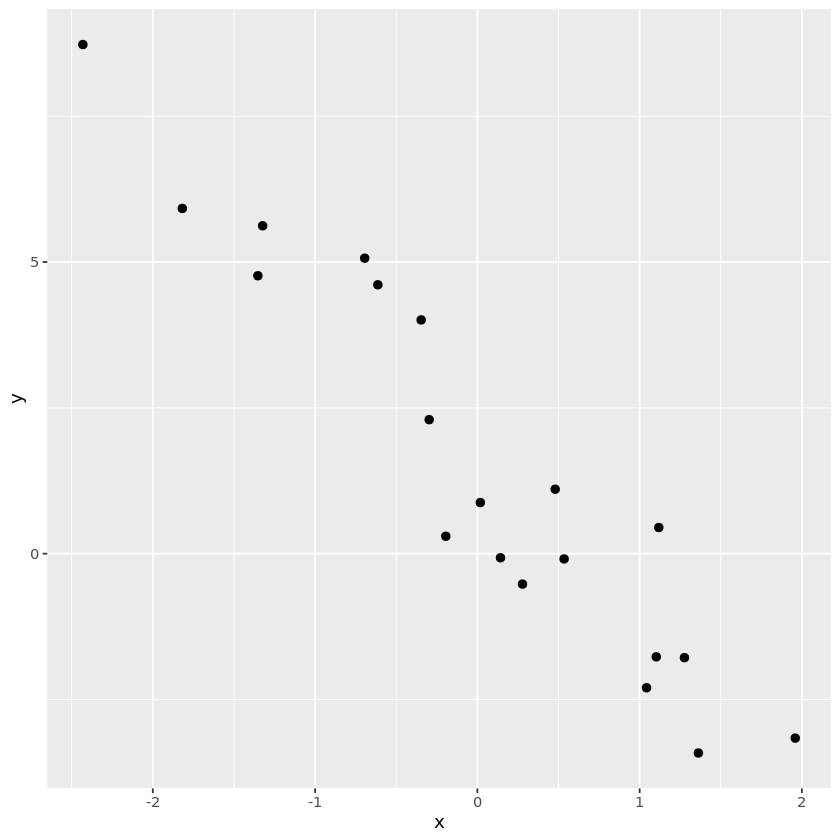

In [5]:
gg + 
geom_point(aes(x=x,y=y),size=2)

Usamos la función [lm](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm) del paquete `stats` de R para ajustar un modelo de regresión lineal:

In [6]:
linear_model <- lm(df$y~df$x)

In [7]:
print(linear_model$coefficients)

(Intercept)        df$x 
   1.565663   -2.810582 


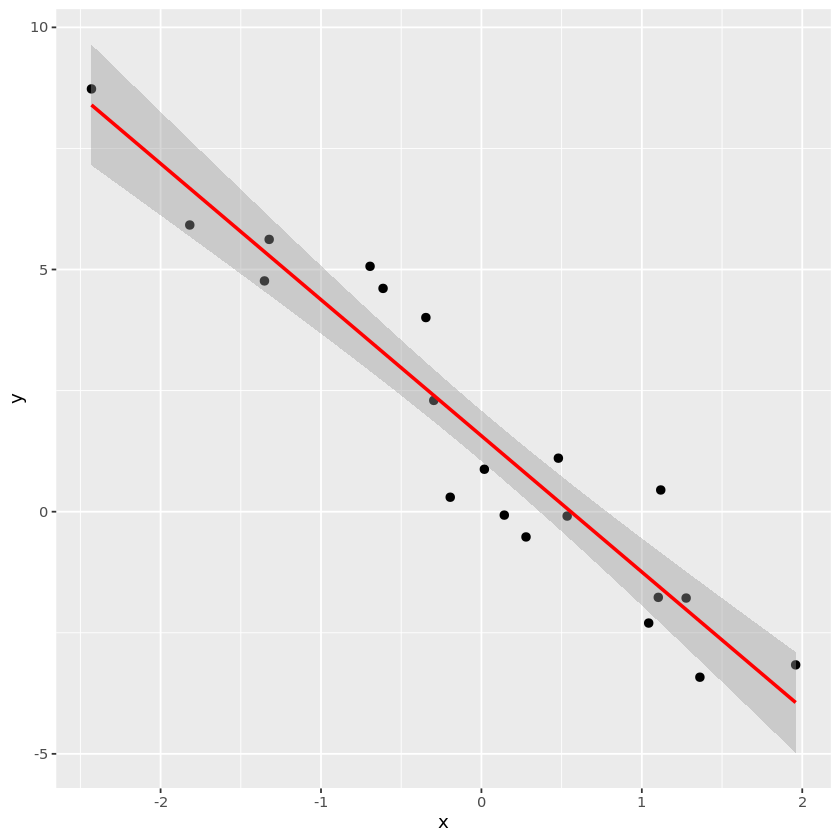

In [8]:
gg +
geom_point(aes(x=x,y=y),size=2) +
geom_smooth(method='lm',colour='red')

**Aplicamos el método de descenso en gradiente para comparación con lo calculado vía `lm`**

Recordamos que el problema de optimización es: $$\displaystyle \min_{\beta \in \mathbb{R}^n} \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [9]:
cte <- sum(y*y)

In [10]:
A <- matrix(c(rep(1,mpoints),df$x),nrow=mpoints)

**Función objetivo:**

In [11]:
fo <-function(beta)1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))


**Punto inicial $\beta_0=(0,0)^T$:**

In [12]:
beta_0 <- matrix(c(0,0),nrow=2)

In [13]:
beta_ast <- c(linear_model$coefficients[1],linear_model$coefficients[2])


**$\beta^*$ (punto óptimo)**:

In [14]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


**$p^*$ (valor óptimo)**:

In [15]:
p_ast <- fo(beta_ast)

In [16]:
p_ast

[1] 11.1175

**argumentos para el método de descenso en gradiente:**

In [17]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30


In [18]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    7.73e+01   1.00e+00      1.11e+01      ---
2    4.17e+01   5.17e-01      3.11e+00      0.0625
3    2.41e+01   2.95e-01      1.03e+00      0.0625
4    1.41e+01   1.73e-01      3.52e-01      0.0625
5    8.27e+00   1.01e-01      1.21e-01      0.0625
6    4.86e+00   5.95e-02      4.18e-02      0.0625
7    2.85e+00   3.49e-02      1.44e-02      0.0625
8    1.68e+00   2.05e-02      4.97e-03      0.0625
9    9.84e-01   1.20e-02      1.72e-03      0.0625
10    5.78e-01   7.07e-03      5.92e-04      0.0625
11    3.39e-01   4.15e-03      2.04e-04      0.0625
12    1.99e-01   2.44e-03      7.04e-05      0.0625
13    1.17e-01   1.43e-03      2.43e-05      0.0625
14    6.88e-02   8.42e-04      8.38e-06      0.0625
15    4.04e-02   4.94e-04      2.89e-06      0.0625
16    2.37e-02   2.90e-04      9.96e-07      0.0625
17    1.39e-02   1.70e-04      3.43e-07      0.0625
18    8.19e-03   1.00e-04      1.19e-07      0.0625
19    4.81e-03   5.89

**Soluciones que están en la lista `l`:**

In [19]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso en gradiente:**

In [20]:
print(beta)

          [,1]
[1,]  1.565663
[2,] -2.810582


**$\beta^*$:**

In [21]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


**Error relativo:**

In [22]:
compute_error(beta_ast, beta)

[1] 3.486887e-08

**tenemos alrededor de $8$ dígitos de precisión.**

In [23]:
beta_plot

0,1.914276,1.503255,1.566829,1.573826,1.558663,1.570324,1.562788,1.567386,1.564643,⋯,1.565666,1.565661,1.565664,1.565662,1.565663,1.565663,1.565663,1.565663,1.565663,1.565663
0,-4.435513,-1.862656,-3.365714,-2.484941,-3.001737,-2.698338,-2.876499,-2.771869,-2.833318,⋯,-2.810517,-2.810620,-2.810560,-2.810595,-2.810574,-2.810586,-2.810579,-2.810584,-2.810581,-2.810582


In [24]:
total_of_iterations

[1] 30

In [25]:
gg <- ggplot()

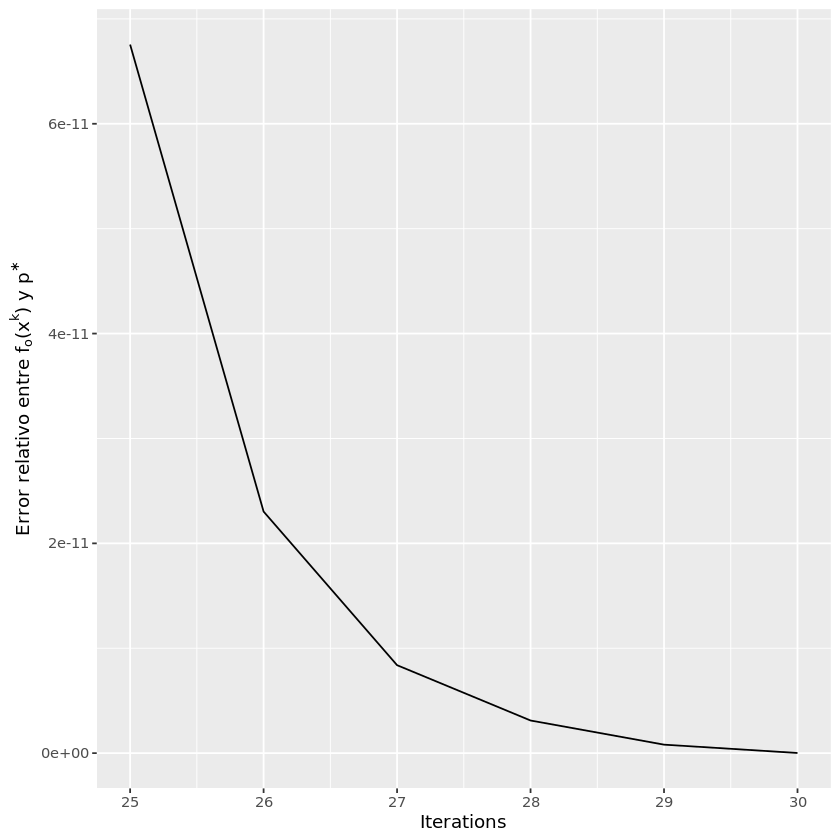

In [26]:
gg +
geom_line(aes(x=25:total_of_iterations,y=Err_plot[25:length(Err_plot)])) + 
xlab('Iterations') + ylab(TeX('Error relativo entre f_o(x^k) y p^*'))


## Regularización

En el paquete de R [glmnet package](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) se tiene la función del mismo nombre [glmnet](https://www.rdocumentation.org/packages/glmnet/versions/3.0-2/topics/glmnet) en la que se ajustan [modelos lineales generalizados](https://en.wikipedia.org/wiki/Generalized_linear_model) con penalización *elastic net*. La **función objetivo** en el caso de regresión lineal utiliza una **pérdida cuadrática** con regularización *elastic net*:

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \lambda \left (\frac{(1-\alpha)}{2}||\beta||^2_2 + \alpha ||\beta||_1 \right )$$

donde: $x_i \in \mathbb{R}^n$. Véase el paper [Regularization Paths for Generalized Linear Models via Coordinate Descent](https://web.stanford.edu/~hastie/Papers/glmnet.pdf) para esta formulación. Obsérvese que no se penaliza la variable $\beta_0$.

### Penalización lasso vía método de Newton

**En este segundo ejemplo utilizamos la penalización *lasso***.

Obsérvese que para este caso la función objetivo en `glmnet` es de la forma:

$$\displaystyle \min_{(\beta_0, \beta) \in \mathbb{R}^{n+1}} \frac{1}{2m} \sum_{i=1}^m(y_i -\beta_0 - x_i^T\beta)^2  + \lambda \alpha ||\beta||_1$$

Simulamos algunos datos:

**Obs:** se utilizarán los siguientes argumentos para la función de R:

In [27]:
reg<-.5 #este es lambda * alpha, el parámetro de regularización
        #en la formulación de glmnet

In [28]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,thresh=1e-8)

In [29]:
beta_ast <- as.matrix(fit$beta)


**El valor aproximado de $\beta^*$ es:**

In [30]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


**Obsérvese que $\beta^*_0$ es $0$ y por tanto se puede eliminar el intercepto del modelo.**

In [31]:
head(A)

1,1.1025783
1,1.1178965
1,-1.8181019
1,-0.1944140
1,-0.6131956
1,-0.3462673


In [32]:
A<-A[,-1]

In [33]:
head(A)

[1]  1.1025783  1.1178965 -1.8181019 -0.1944140 -0.6131956 -0.3462673

In [37]:
beta_ast<-beta_ast[2]

In [38]:
print(beta_ast)

[1] -2.416619


Usaremos el método de **descenso por coordenadas** y el método de Newton para aproximar al vector $\beta^*$. Ver [4.2.Descenso_por_coordenadas_R.ipynb](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Descenso_por_coordenadas_R.ipynb), [4.2.Metodo_de_Newton_Python](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/IV.optimizacion_convexa_y_machine_learning/4.2.Metodo_de_Newton_Python.ipynb). Además usaremos la siguiente función que ayuda a aproximar la derivada de la función objetivo $f_o$ que no es diferenciable en el vector $0$ pues $||\beta||_1 = \displaystyle \sum_{i=1}^n |\beta_i|$.

In [39]:
quita_signo<-function(beta){
    beta<-sign(beta)*beta
    #la siguiente variable es un índice que localiza aquellas entradas del
    #vector beta en valor absoluto que son cercanas a 0.
    ind <- beta < .Machine$double.xmin & beta > -.Machine$double.xmin 
    #se asigna a cada entrada localizada en ind el valor más pequeño normalizado
    #en un sistema de punto flotante
    beta[ind] <- .Machine$double.xmin 
    beta
    }

In [40]:
.Machine$double.xmin

[1] 2.225074e-308

**La función objetivo es:**

In [41]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(A*y)) + 
                              1/2*sum(beta*(A*(A*beta)))) + 
                              reg*sum(quita_signo(beta))


**Valor óptimo:**

In [42]:
p_ast <- fo(beta_ast)

In [43]:
p_ast

[1] 3.080822

**punto inicial $\beta_0$:**

In [44]:
beta_0<-c(0)

**argumentos para el método de descenso por coordenadas:**

In [45]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30


In [46]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.05e+00   1.00e+00      1.19e+00      ---
2    4.79e-01   1.62e-01      2.93e-02      0.5
3    1.29e-01   3.59e-02      2.08e-03      1
4    3.47e-02   1.75e-02      1.08e-04      1
5    9.36e-03   3.15e-03      3.50e-05      1
6    2.52e-03   7.02e-03      4.54e-05      1
7    6.79e-04   5.98e-03      4.62e-05      1
8    1.83e-04   6.26e-03      4.62e-05      1
9    4.92e-05   6.18e-03      4.62e-05      1
10    1.32e-05   6.20e-03      4.62e-05      1
11    3.51e-06   6.20e-03      4.62e-05      1
12    8.88e-07   6.20e-03      4.62e-05      1
13    2.22e-07   6.20e-03      4.62e-05      1
14    8.88e-08   6.20e-03      4.62e-05      1
15    0.00e+00   6.20e-03      4.62e-05      1
Error of x with respect to x_ast: 6.20e-03
Approximate solution:[1] -2.401638


**Soluciones que están en la lista `l`:**

In [47]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


**$\beta$ aproximada por el método de descenso por coordenadas:**

In [48]:
print(beta)

[1] -2.401638


**El valor aproximado de $\beta^*$ es:**

In [49]:
print(beta_ast)

[1] -2.416619


**Error relativo:**

In [50]:
compute_error(beta_ast, beta)

[1] 0.006199409

**Tenemos alrededor de $2$ dígitos de precisión**

In [52]:
print(beta_plot)

 [1]  0.000000 -2.024205 -2.503282 -2.374264 -2.409010 -2.399653 -2.402172
 [8] -2.401494 -2.401677 -2.401627 -2.401641 -2.401637 -2.401638 -2.401638
[15] -2.401638


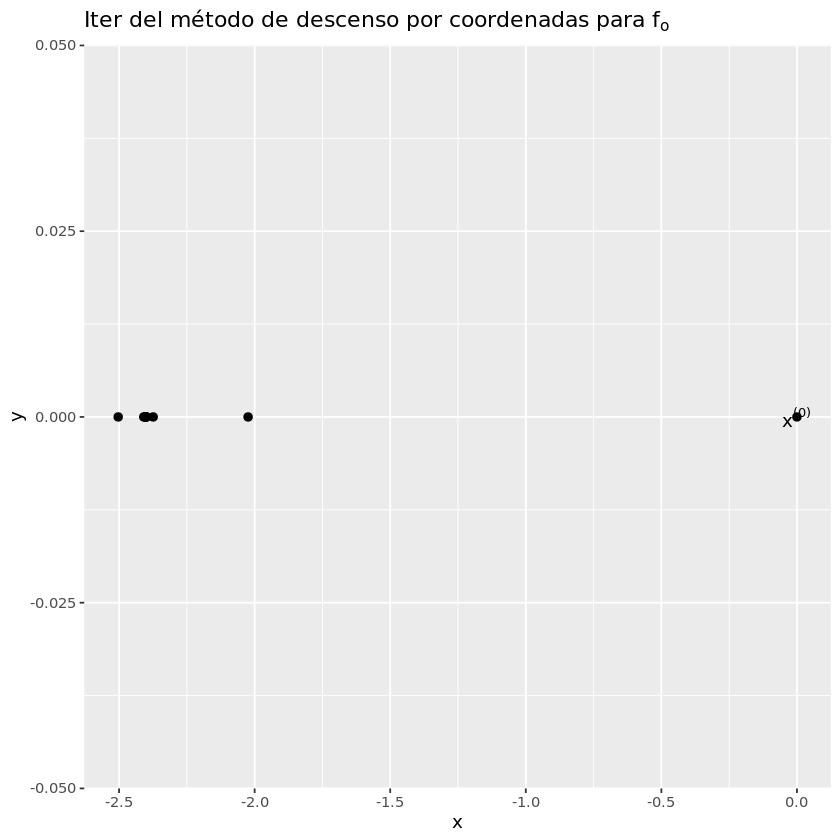

In [56]:
gg +
geom_point(aes(x=beta_plot,y=0),size=2) +
annotate(geom='text', x=0, y=0, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso por coordenadas para $f_o$'))

**Método de Newton**

In [57]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normgf   Newton Decrement   Error x_ast   Error p_ast   line search    condHf
1    4.05e+00   1.29e+01           1.00e+00      1.19e+00      ---         1.00e+00
2    1.00e+00   7.92e-01           3.21e-01      1.29e-01      1.00e+00    1.00e+00
3    6.24e-04   3.07e-07           6.00e-03      4.62e-05      1.00e+00    1.00e+00
4    1.78e-07   2.48e-14           6.20e-03      4.62e-05      1.00e+00    1.00e+00
Error of x with respect to x_ast: 6.20e-03
Approximate solution:[1] -2.401638


In [58]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [59]:
print(beta)

[1] -2.401638


In [60]:
print(beta_ast)

[1] -2.416619


**Error relativo:**

In [61]:
compute_error(beta_ast, beta)

[1] 0.00619936

**Tenemos alrededor de $2$ dígitos de precisión**

In [63]:
print(beta_plot)

[1]  0.000000 -3.191950 -2.402130 -2.401638


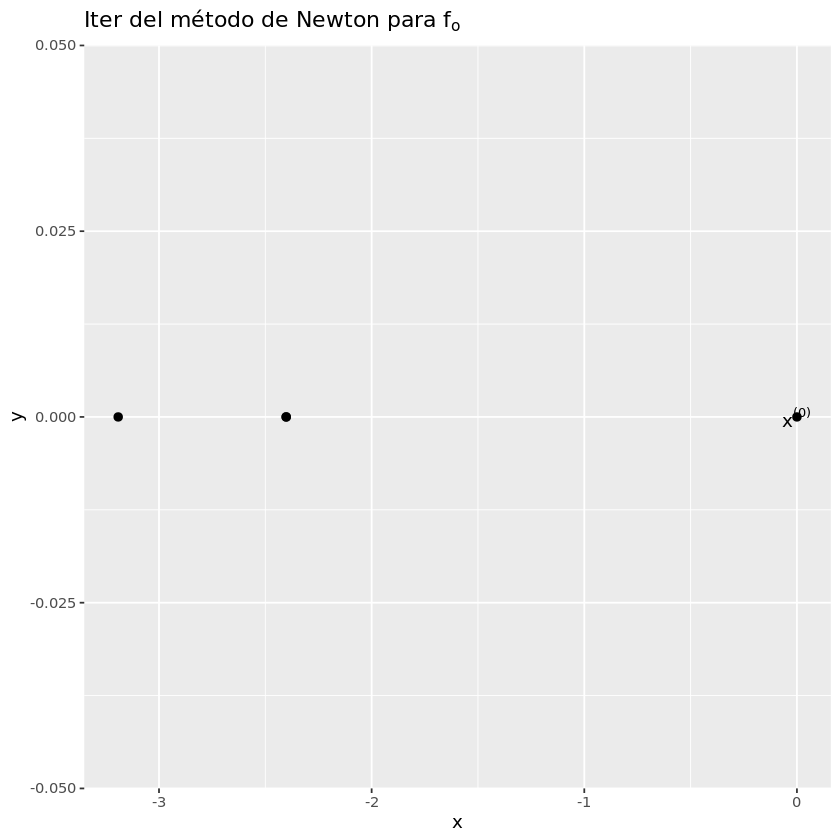

In [64]:
gg +
geom_point(aes(x=beta_plot,y=0),size=2) +
annotate(geom='text', x=0, y=0, 
         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de Newton para $f_o$'))

**Comentarios:**

* En ambos métodos se aproxima de forma correcta a $\beta_1^*$. 

**Modelo sin intercepto**

In [55]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
x1 <- rnorm(mpoints)
x2 <- rnorm(mpoints,2,1)
y <- 3*x1 -.5*x2

In [56]:
A<-cbind(x1,x2)

In [57]:
head(A)

x1,x2
1.1025783,1.5387010
1.1178965,3.8017872
-1.8181019,0.4648409
-0.1944140,-0.2847978
-0.6131956,2.7705346
-0.3462673,2.9691806


In [58]:
head(y)

[1]  2.5383843  1.4527959 -5.6867261 -0.4408432 -3.2248541 -2.5233921

In [59]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [60]:
cte

[1] 230.9837

In [61]:
mpoints

[1] 20

In [62]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))


In [63]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [64]:
beta_ast <- as.matrix(fit$beta)


In [65]:
print(beta_ast)

           s0
x1  2.5715256
x2 -0.3309675


In [66]:
beta_0<-c(1,1)

In [67]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [68]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normgf   Newton Decrement   Error x_ast   Error p_ast   line search    condHf
1    5.65e+00   1.14e+01           7.94e-01      3.27e+00      ---         2.93e+00
2    1.00e+00   2.81e-01           1.11e-01      8.78e-02      1.00e+00    2.94e+00
3    5.79e-04   1.57e-07           1.19e-04      4.91e-08      1.00e+00    2.94e+00
4    5.62e-07   2.47e-13           1.95e-07      9.92e-14      1.00e+00    2.94e+00
Error of x with respect to x_ast: 1.95e-07
Approximate solution:[1]  2.5715261 -0.3309675


In [69]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [70]:
print(beta)

[1]  2.5715261 -0.3309675


In [71]:
print(beta_ast)

           s0
x1  2.5715256
x2 -0.3309675


**Other example:**

In [80]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [81]:
A<-X[,c(2,4)]

In [82]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [83]:
cte

[1] 14042.31

In [84]:
mpoints

[1] 32

In [85]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))


In [86]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [87]:
beta_ast <- as.matrix(fit$beta)


In [88]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [89]:
beta_0<-c(1,1)

**Newtons method**

In [90]:
gradient_approximation(fo,beta_0)

[1] 64876.0375   723.5409

In [91]:
gf_evaluation(beta_0)

disp,64876.0371
drat,723.5409


In [92]:
Hessian_approximation(fo,beta_0)

68106.6012,774.889486
774.8895,3.637979


In [93]:
Hessian_evaluation()

,disp,drat
disp,68113.3584,784.21238
drat,784.2124,13.21221


In [94]:
beta_0

[1] 1 1

In [95]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [96]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normgf   Newton Decrement   Error x_ast   Error p_ast   line search    condHf
1    6.49e+04   6.18e+04           8.62e-01      3.10e+04      ---         1.32e+04
2    4.89e+01   3.15e+02           1.28e+00      1.50e+02      1.00e+00    1.64e+04
3    1.42e+00   3.62e-01           4.42e-02      1.78e-01      1.00e+00    1.66e+04
4    2.95e-02   1.43e-04           8.68e-04      7.21e-05      1.00e+00    1.62e+04
5    3.69e-04   9.53e-09           1.65e-05      6.86e-08      1.00e+00    1.57e+04
Error of x with respect to x_ast: 1.65e-05
Approximate solution:[1] -0.01682385  6.59064139


In [97]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [98]:
print(beta)

[1] -0.01682385  6.59064139


In [99]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [100]:
fo(beta)

[1] 9.777368

In [101]:
beta_plot

1,0.07949562,-0.02019068,-0.01675652,-0.01682385
1,-1.81796641,6.88212076,6.58481401,6.59064139


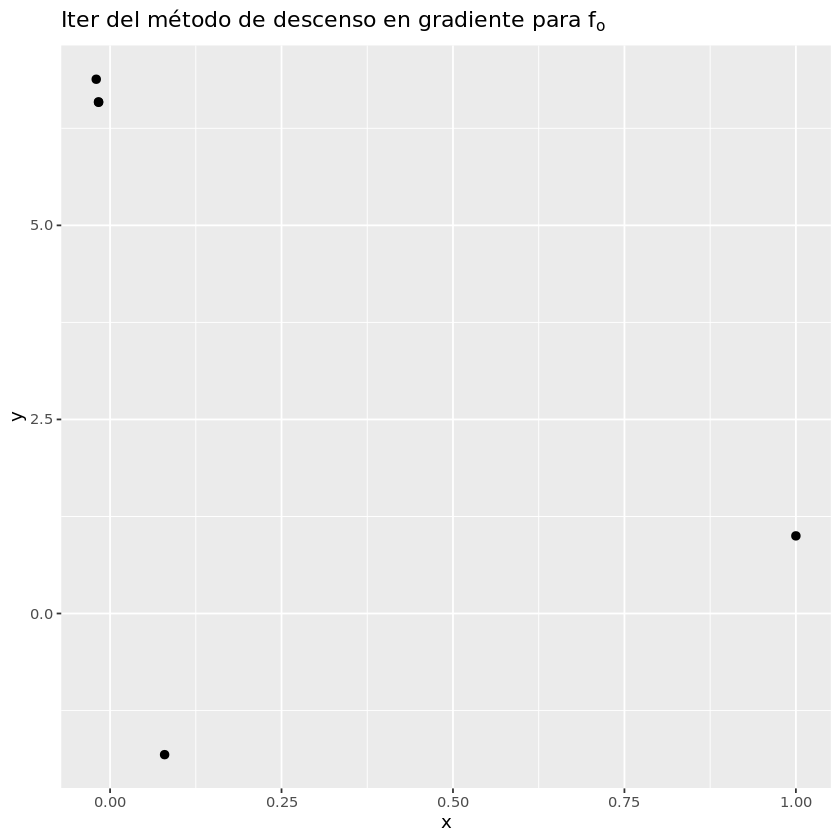

In [102]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Cambiando parámetro de regularización**

In [103]:
reg<-0.2

In [104]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [105]:
beta_ast <- as.matrix(fit$beta)


In [106]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [107]:
beta_0<-c(1,1)

In [108]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


**Newtons method**

In [109]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normgf   Newton Decrement   Error x_ast   Error p_ast   line search    condHf
1    6.49e+04   6.16e+04           8.64e-01      3.10e+04      ---         4.20e+04
2    9.82e+01   1.19e+03           2.54e+00      6.05e+02      1.00e+00    1.60e+04
3    2.51e+00   2.55e-01           3.73e-02      1.30e-01      1.00e+00    1.60e+04
4    1.66e-02   5.67e-05           5.24e-04      2.77e-05      1.00e+00    1.66e+04
5    5.20e-04   1.93e-08           3.37e-05      6.50e-08      1.00e+00    1.59e+04
Error of x with respect to x_ast: 3.37e-05
Approximate solution:[1] -0.01766474  6.66329488


In [110]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [111]:
print(beta)

[1] -0.01766474  6.66329488


In [112]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [113]:
fo(beta)

[1] 7.784107

In [114]:
beta_plot

1,0.1764839,-0.01483255,-0.01762187,-0.01766474
1,-10.2852230,6.41439908,6.65957987,6.66329488


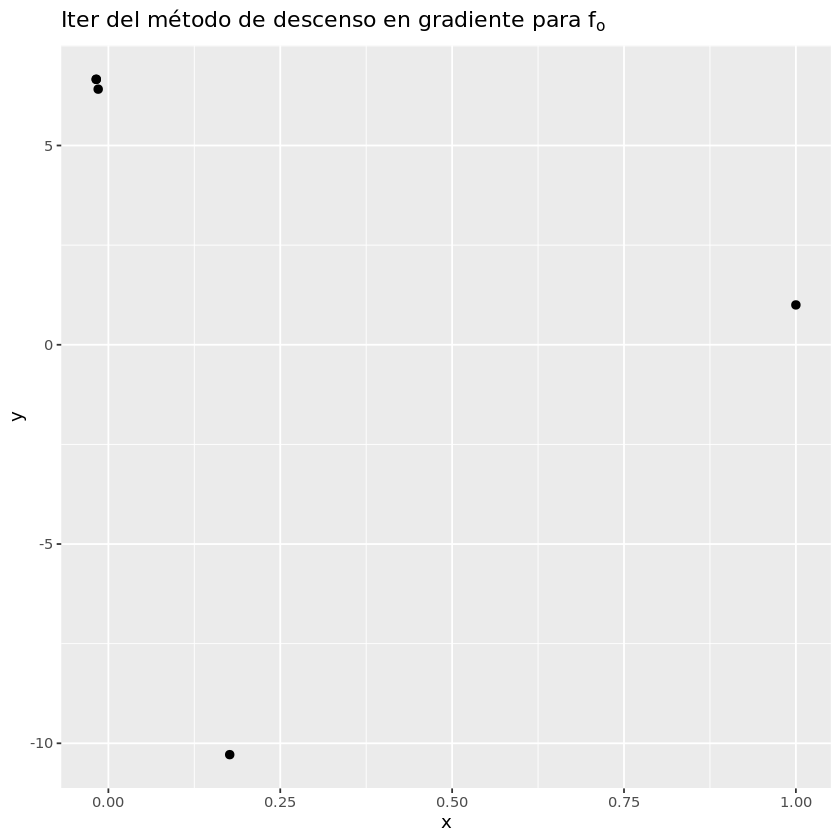

In [115]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

### Penalización lasso vía descenso por coordenadas

In [116]:
beta_0<-c(0,0)

In [117]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.12e+02      ---
2    1.60e+02   1.00e+00      9.31e+01      1.52587890625e-05
3    2.86e+01   1.00e+00      9.29e+01      1.52587890625e-05
4    2.73e+03   4.76e-01      7.59e+01      0.125
5    1.08e+02   4.76e-01      2.11e+01      1.52587890625e-05
6    1.39e+01   4.76e-01      2.10e+01      1.52587890625e-05
7    1.30e+03   2.28e-01      1.72e+01      0.125
8    5.20e+01   2.28e-01      4.84e+00      1.52587890625e-05
9    6.64e+00   2.28e-01      4.82e+00      1.52587890625e-05
10    6.22e+02   1.09e-01      3.95e+00      0.125
11    2.47e+01   1.09e-01      1.11e+00      1.52587890625e-05
12    3.18e+00   1.09e-01      1.11e+00      1.52587890625e-05
13    2.98e+02   5.22e-02      9.05e-01      0.125
14    1.18e+01   5.22e-02      2.55e-01      1.52587890625e-05
15    1.52e+00   5.22e-02      2.54e-01      1.52587890625e-05
16    1.43e+02   2.50e-02      2.08e-01      0.125
17    5.66e+00   2.5

In [118]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [119]:
print(beta)

[1] -0.01756272  6.65444873


In [120]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [121]:
fo(beta)

[1] 7.784268

In [122]:
beta_plot

0,0.06136831,0.05895485,0.05895485,0.01724231,0.01888275,0.01888275,-0.0009476207,-0.0001616408,-0.0001616408,⋯,-0.01674264,-0.01674264,-0.01724231,-0.01722266,-0.01722266,-0.01746201,-0.0174526,-0.0174526,-0.01756723,-0.01756272
0,0.00000000,0.00000000,3.49381608,3.49381608,3.49381608,5.14563299,5.1456329864,5.1456329864,5.9362877280,⋯,6.58333947,6.62496245,6.62496245,6.62496245,6.64489965,6.64489965,6.6448997,6.6544487,6.65444873,6.65444873


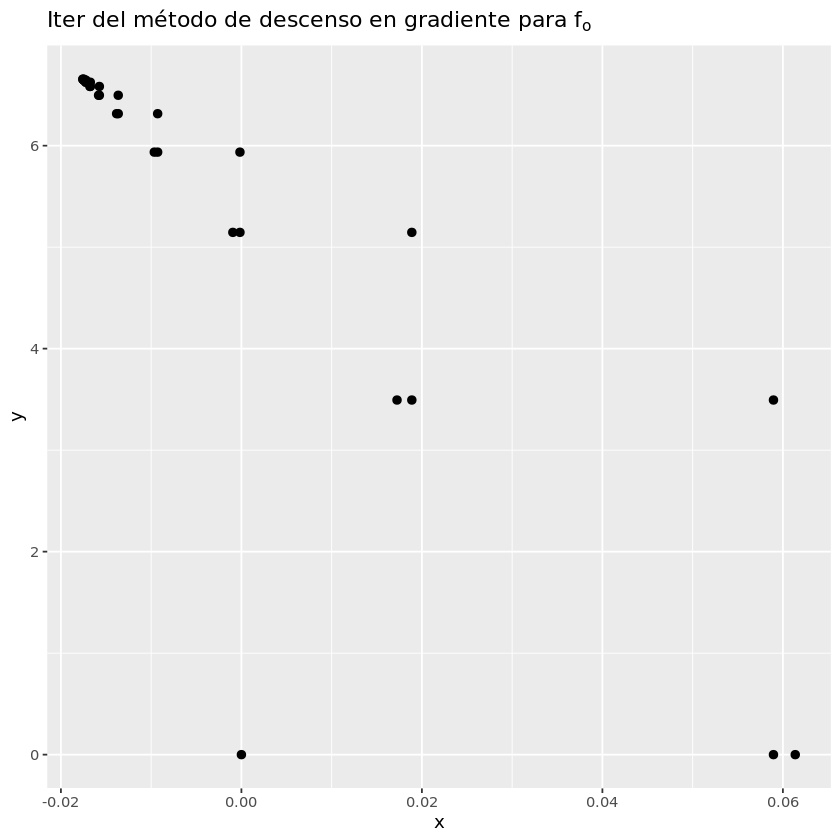

In [123]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Comparación con gradient descent**

In [124]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.12e+02      ---
2    1.61e+02   1.00e+00      9.30e+01      1.52587890625e-05
3    2.86e+01   1.00e+00      9.28e+01      1.52587890625e-05
4    2.04e+02   9.98e-01      9.28e+01      0.00048828125
5    2.89e+01   9.98e-01      9.25e+01      1.52587890625e-05
6    1.28e+02   9.97e-01      9.24e+01      0.000244140625
7    2.82e+01   9.97e-01      9.23e+01      1.52587890625e-05
8    1.61e+02   9.95e-01      9.21e+01      0.00048828125
9    2.84e+01   9.95e-01      9.19e+01      1.52587890625e-05
10    2.04e+02   9.93e-01      9.18e+01      0.00048828125
11    2.88e+01   9.92e-01      9.15e+01      1.52587890625e-05
12    1.28e+02   9.91e-01      9.14e+01      0.000244140625
13    2.81e+01   9.91e-01      9.13e+01      1.52587890625e-05
14    1.61e+02   9.89e-01      9.11e+01      0.00048828125
15    2.83e+01   9.89e-01      9.09e+01      1.52587890625e-05
16    2.04e+02   9.87e-01      9.08e+01      

In [125]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [126]:
print(beta)

[1] 0.05901972 0.16175495


In [127]:
print(beta_ast)

              s0
disp -0.01766132
drat  6.66307033


In [128]:
fo(beta)

[1] 96.33409

In [129]:
beta_plot

0,0.061368308,0.058941308,0.06184346,0.05875461,0.06062378,0.05871641,0.06096286,0.05853562,0.06143894,⋯,0.05773067,0.06063629,0.05754652,0.05941755,0.05750965,0.05975933,0.05733139,0.06023815,0.05714807,0.05901972
0,0.001131953,0.001529336,0.01517238,0.01556124,0.02237325,0.02277526,0.03636735,0.03676248,0.05033357,⋯,0.10667081,0.12009913,0.12048129,0.12718616,0.12758147,0.14095952,0.14134797,0.15470547,0.15508541,0.16175495


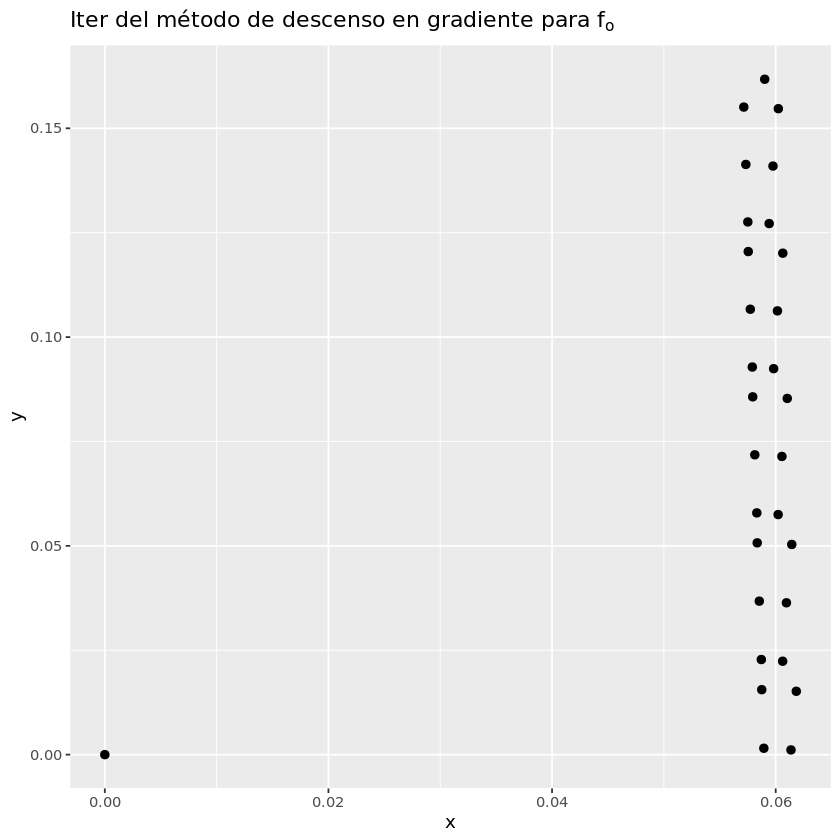

In [130]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**More columns**

In [131]:
A<-X[,c(2,4,5,6)]

In [132]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [133]:
beta_ast <- as.matrix(fit$beta)


In [134]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


In [135]:
beta_0<-c(1,1,1,1)

In [136]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


**Newtons method**

In [137]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normgf   Newton Decrement   Error x_ast   Error p_ast   line search    condHf
1    6.99e+04   7.14e+04           1.08e+00      3.57e+04      ---         3.58e+04
2    1.62e+01   1.66e+01           1.41e+00      6.99e+00      1.00e+00    4.71e+05
3    1.58e+00   4.78e+00           1.00e+00      2.09e+00      1.00e+00    5.34e+05
4    3.38e-01   3.11e-01           1.89e-01      1.33e-01      1.00e+00    3.24e+05
5    3.03e-01   9.68e-03           3.61e-02      4.24e-03      1.00e+00    7.76e+05
6    2.92e-02   1.34e-04           5.76e-03      6.96e-05      1.00e+00    5.27e+05
7    5.44e-03   4.01e-05           7.19e-04      1.07e-05      1.00e+00    3.14e+05
8    2.18e-03   8.46e-05           1.62e-03      1.64e-05      1.00e+00    3.32e+06
9    3.01e-03   8.49e-07           3.30e-03      2.16e-05      1.25e-01    4.48e+05
10    1.01e-04   -1.91e-09           3.43e-03      2.20e-05      1.00e+00    1.97e+06
Error of x with respect to x_ast: 3.43e-03
Approximate solution:[1]  0.0006

In [138]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [139]:
print(beta)

[1]  0.0006261966  2.6223707978 -3.6105443552  1.2371047935


In [140]:
print(beta_ast)

                s0
disp  0.0006973293
drat  2.6120443627
wt   -3.6222009972
qsec  1.2403485581


In [141]:
fo(beta)

[1] 4.595929

In [142]:
beta_plot

1,-0.05606289,-0.01851005,-0.003576263,0.0009944162,0.0005168405,0.0007160974,0.0006791189,0.0006377508,0.0006261966
1,-0.12200766,5.97538040,1.869463441,2.7751959837,2.6038033655,2.6095959668,2.6183362938,2.6231848830,2.6223707978
1,2.31423223,-0.55655647,-3.169499864,-3.6324961838,-3.5968211157,-3.6243745447,-3.6184323138,-3.6122536944,-3.6105443552
1,1.48267081,0.26564075,1.362212247,1.2057895393,1.2396914838,1.2409809623,1.2386540494,1.2371100579,1.2371047935


### Penalización ridge vía SVD

In [143]:
reg<-.5

In [144]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [145]:
A<-X[,c(2,4)]

Computation of ridge regression solution:

In [146]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
tv <- t(singular_value_decomposition$v)

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [147]:
beta_ridge <- solve(tv,cte_svd)

In [148]:
beta_ridge

mpg
-0.01793611
6.68661032


In [149]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [150]:
beta_ast <- as.matrix(fit$beta)


In [151]:
print(beta_ast)

              s0
disp -0.01669418
drat  6.57883316


**Más columnas:**

In [152]:
A<-X[,c(2,4,5,6)]

In [153]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [154]:
beta_ast <- as.matrix(fit$beta)


In [155]:
print(beta_ast)

               s0
disp -0.002266897
drat  2.574343046
wt   -3.235364158
qsec  1.216575201


In [156]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
tv <- t(singular_value_decomposition$v)

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [157]:
beta_ridge <- solve(tv,cte_svd)

In [158]:
beta_ridge

mpg
0.007263538
2.819440010
-4.490056911
1.271431770


In [159]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg/2*sum(beta*beta)


In [160]:
fo

function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg/2*sum(beta*beta)

In [161]:
Hessian_evaluation<-function(beta)1/mpoints*t(A)%*%A + reg*diag(rep(length(beta)))

In [162]:
gf_evaluation<- function(beta) 1/mpoints * t(A)%*%(A%*%beta-y) + reg*beta

In [163]:
beta_0<-c(1,1,1,1)

In [164]:
gradient_approximation(fo,beta_0)

[1] 69747.6957   799.0311   867.0460  4105.6657

In [165]:
gf_evaluation(beta_0)

disp,69747.6931
drat,799.0295
wt,867.0453
qsec,4105.6640


In [166]:
Hessian_approximation(fo,beta_0)

68095.6873,763.975549,829.45917,4016.32860
763.9755,-7.275958,-14.55192,50.93170
829.4592,-14.551915,-14.55192,36.37979
4016.3286,50.931703,36.37979,312.86618


In [167]:
Hessian_evaluation(beta_0)

,disp,drat,wt,qsec
disp,68113.8584,784.21238,846.60903,4025.04700
drat,784.2124,13.71221,11.20997,64.27856
wt,846.6090,11.20997,11.77816,57.12796
qsec,4025.0470,64.27856,57.12796,322.17126


In [168]:
kappa(Hessian_evaluation(beta_0))

[1] 124559.1

In [169]:
beta_0<-c(0,0,0,0)

In [170]:
gradient_approximation(fo,beta_0)

[1] -4022.03341   -74.38366   -59.67977  -362.96078

In [171]:
gf_evaluation(beta_0)

disp,-4022.03375
drat,-74.38366
wt,-59.67977
qsec,-362.96078


In [172]:
Hessian_approximation(fo,beta_0)

68113.8204,784.21181,846.62588,4025.05407
784.2118,13.72769,11.22658,64.28991
846.6259,11.22658,11.79501,57.12764
4025.0541,64.28991,57.12764,322.16008


In [173]:
Hessian_evaluation(beta_0)

,disp,drat,wt,qsec
disp,68113.8584,784.21238,846.60903,4025.04700
drat,784.2124,13.71221,11.20997,64.27856
wt,846.6090,11.20997,11.77816,57.12796
qsec,4025.0470,64.27856,57.12796,322.17126


In [174]:
kappa(Hessian_evaluation(beta_0))

[1] 124559.1

In [175]:
kappa(t(A)%*%A)

[1] 588095.4

**Other selection of columns**

In [176]:
A<-X[,c(4,5,6)]

In [177]:
cor(A)

,drat,wt,qsec
drat,1.00000000,-0.7124406,0.09120476
wt,-0.71244065,1.0000000,-0.17471588
qsec,0.09120476,-0.1747159,1.00000000


In [178]:
kappa(t(A)%*%A)

[1] 1581.606

In [179]:
beta_0<-c(1,1,1)

In [180]:
kappa(Hessian_evaluation(beta_0))

[1] 602.7978

In [181]:
fit <- glmnet(A,y,alpha=0,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [182]:
beta_ast <- as.matrix(fit$beta)


In [183]:
print(beta_ast)

            s0
drat  2.568637
wt   -3.478654
qsec  1.232553


In [184]:
#svd of A
singular_value_decomposition <- svd(A)
s <- singular_value_decomposition$d
u <- singular_value_decomposition$u
tv <- t(singular_value_decomposition$v)

cte_svd <- s/(s^2+reg)*(t(u)%*%y)

In [185]:
beta_ridge <- solve(tv,cte_svd)

In [186]:
beta_ridge

mpg
2.892362
-3.643442
1.197395


In [187]:
compute_error(x_approx = beta_ridge, x_obj = beta_ast)

[1] 0.08116398

**Referencias:**

* Ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) para una introducción al problema de mínimos cuadrados con ejemplos en Python3.